# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 11/29/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 11/29/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,650,38928341,1.7
Albania,6481,2877800,225.2
Algeria,2240,43851043,5.1
Andorra,805,77265,1041.9
Angola,242,32866268,0.7
Antigua and Barbuda,23,97928,23.5
Argentina,21257,45195777,47.0
Armenia,8779,2963234,296.3
Australia,18621,25459700,73.1


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Slovakia,148910,5459643,2727.5
Czechia,236305,10708982,2206.6
Belgium,236995,11492641,2062.1
Austria,180268,9006400,2001.6
Slovenia,38449,2078932,1849.5
Liechtenstein,685,38137,1796.2
Netherlands,307445,17134873,1794.3
Croatia,64460,4105268,1570.2
Hungary,135874,9660350,1406.5


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

11/25/21    5670253.0
11/26/21    5735837.0
11/27/21    5780814.0
11/28/21    5804139.0
11/29/21    5854884.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

11/16/21        NaN
11/17/21    68366.0
11/18/21    58768.0
11/19/21    57302.0
11/20/21    45183.0
11/21/21    26241.0
11/22/21    47887.0
11/23/21    68049.0
11/24/21    79051.0
11/25/21    74579.0
11/26/21    65584.0
11/27/21    44977.0
11/28/21    23325.0
11/29/21    50745.0
Name: Germany, dtype: float64

<AxesSubplot:>

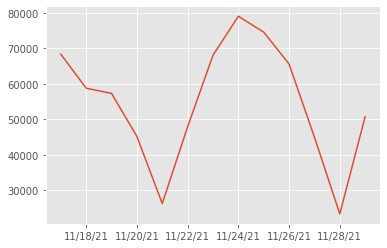

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

853.8954185465941